# The Spark Foundation - Data Science and Business Analytics Intern

## Task 2 - To Predict the Optimal Number of clusters

### Submitted by Ankita Bhattacharjee

# Reading and understanding the Dataset

In [27]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn import datasets

df_iris=pd.read_csv('C:/Users/S/Downloads/Iris - Iris (1).csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df_iris.shape

(150, 6)

Thus there are 150 rows and 6 columns

In [30]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


All the four columns contains float datatype

In [31]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Checking if the dataset contains any null values

In [32]:
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Thus our dataset donot contain any null values

In [33]:
#Checking if the dataset contains any duplicatet values
df_iris.duplicated().sum()

0

Thus the dataset contains only one duplicate values.

In [34]:
#Dropping the duplicate values from the dataset
df_iris.drop_duplicates(keep=False,inplace=True)

In [35]:
df_iris.duplicated().sum()

0

Thus we have removed the duplicated values

In [36]:
#As the column Id is of no use in our analysis so we will remove it
df_iris.drop('Id', axis=1, inplace=True)


In [37]:
df_iris.drop('Species', axis=1, inplace=True)

In [38]:
df_iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Finding the optimal number of cluster

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

within_cluster_sum_of_square=[]
cluster_range = range(1,15)
for k in cluster_range:
    km=KMeans(n_clusters=k)
    km=km.fit(df_iris)
    within_cluster_sum_of_square.append(km.inertia_)

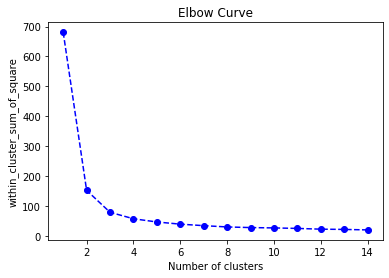

In [45]:
plt.plot(cluster_range,within_cluster_sum_of_square,'go--',color='blue')
plt.title('Elbow Curve')
plt.xlabel("Number of clusters")
plt.ylabel('within_cluster_sum_of_square')
plt.show()

# Applying K Means clusterring on the dataset

In [46]:
from sklearn.cluster import KMeans


In [48]:
data=KMeans(n_clusters = 3, init='k-means++', max_iter=500, n_init=10, random_state=0)
predictions = data.fit_predict(df_iris)

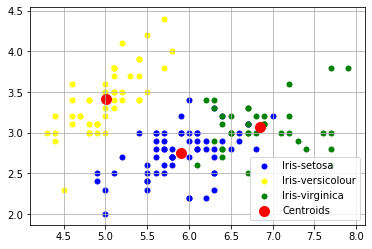

In [56]:
x=df_iris.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions==0,0], x[predictions==0,1],s=25,c='blue',label="Iris-setosa")
plt.scatter(x[predictions==1,0], x[predictions==1,1],s=25,c='yellow',label="Iris-versicolour")
plt.scatter(x[predictions==2,0], x[predictions==2,1],s=25,c='green',label="Iris-virginica")

##plotting the cluster centers
plt.scatter(data.cluster_centers_[:,0],data.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.legend()
plt.grid()
plt.show()